Find out the APPO difference between B2B and B2C clients

We will be using K means clustering

In [2]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(host="dmbrandcommerce.acommerce.platform"
                      ,database="dmbrandcommerce",
                      user="allen", password="8b5uAJjM")

In [3]:
client_list=pd.read_sql_query(
    "select client_name, sum(sku_qty)*1.0/sum(order_count) appo from datawarehouse.sat_sales group by 1"
    ,con=conn)
client_list.head()

,client_name,appo
0,RB Home Care TH,1.288089
1,Samsonite_1 PH,1.743213
2,Maybelline FBL TH,1.734600
3,We Are Feel Good-B2B TH,48.000000
4,Zilingo Fulfilment TH,2.376956


See where the APPOs are

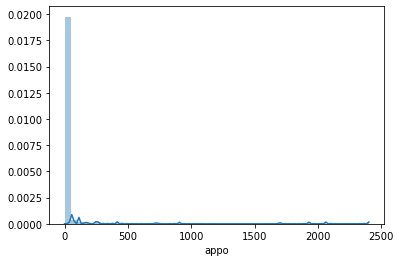

In [4]:
import seaborn as sns
sns.distplot(client_list['appo'])

Compute for k-means clustering

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

data=[client_list['appo'],client_list['appo']]

model = KMeans(n_clusters=2)

# scaling data to normalize
model = model.fit(data)

print(model.inertia_)
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1], c = model.labels_.astype(np.float))
plt.show()

0.0


c:\users\allen.t\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
import operator

def getNeighbors(client_ID,K):
    distances=[]
    for client in 